In [54]:
from datasets import load_dataset
dataset = load_dataset('eurlex')

No config specified, defaulting to: eurlex/eurlex57k


Dataset eurlex downloaded and prepared to /config/.cache/huggingface/datasets/eurlex/eurlex57k/1.1.0/d2fdeaa4fcb5f41394d2ed0317c8541d7f9be85d2d601b9fa586c8b461bc3a34. Subsequent calls will reuse this data.


100%|██████████| 3/3 [00:00<00:00, 615.09it/s]


In [55]:
# read eurovoc concepts into pandas dataframe
import pandas as pd
eurovoc_concepts_df = pd.read_json('./data/datasets/EURLEX57K/eurovoc_concepts.jsonl', lines=True)

In [6]:
eurovoc_concepts_df.head()


,id,title
0,3474,international affairs
1,1597,school legislation
2,3363,union representative
3,4488,data processing
4,2316,barge


In [56]:
train = pd.DataFrame(dataset['train'])
test = pd.DataFrame(dataset['test'])
val = pd.DataFrame(dataset['validation'])
cumulative = pd.concat([train, test, val])

In [101]:
# get the number of documents per class from eurovoc_concepts
labels_count = cumulative.explode('eurovoc_concepts').groupby('eurovoc_concepts').count().reset_index()
labels_count = labels_count[['eurovoc_concepts', 'text']]
labels_count.columns = ['eurovoc_concepts', 'count']
labels_count.head(10)

,eurovoc_concepts,count
0,10,7
1,1000,34
2,1002,2
3,1004,4
4,1005,979
5,1006,23
6,1007,8
7,1008,27
8,1010,5
9,1011,3


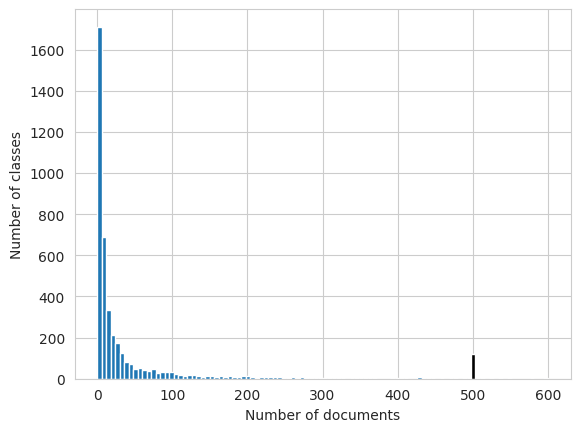

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style("whitegrid")

# plot histogram of the number of documents per class
plt.hist(labels_count['count'], bins=100, range=(0, 600))
plt.xlabel('Number of documents')
plt.ylabel('Number of classes')
plt.bar(500, labels_count[labels_count['count'] >= 500].count(), color='black', width=5)
plt.show();

In [148]:
# Number of classes with less than 10 documents
print(f'Number of classes with less than 10 documents: {labels_count[labels_count["count"] < 10].count().values[0]}')

# Number of classes with less than 50 documents
print(f'Number of classes with less than 50 documents: {labels_count[labels_count["count"] < 50].count().values[0]}')


Number of classes with less than 10 documents: 2222
Number of classes with less than 50 documents: 3423


Average number of words per document: 547.5277017543859
Median number of words per document: 399.0
Max number of words per document: 3479
Min number of words per document: 86
Number of documents with more than 500 words: 19886


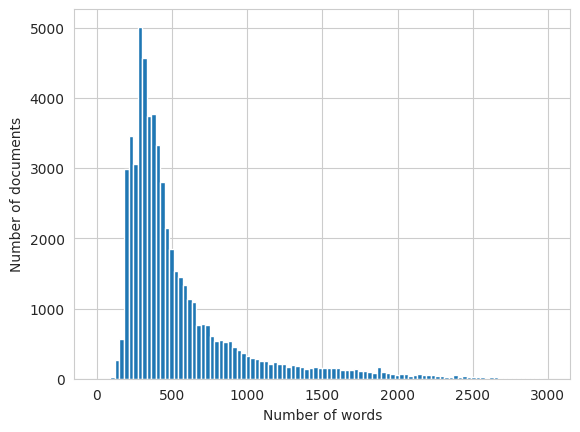

In [155]:
# get the number of words per document
cumulative['num_words'] = cumulative['text'].apply(lambda x: len(x.split()))
print(f'Average number of words per document: {cumulative["num_words"].mean()}')
print(f'Median number of words per document: {cumulative["num_words"].median()}')
print(f'Max number of words per document: {cumulative["num_words"].max()}')
print(f'Min number of words per document: {cumulative["num_words"].min()}')
print(f'Number of documents with more than 500 words: {cumulative[cumulative["num_words"] > 500].count().values[0]}')

# plot histogram of the number of words per document
plt.hist(cumulative['num_words'], bins=100, range=(0, 3000))
plt.xlabel('Number of words')
plt.ylabel('Number of documents')
#plt.bar(500, cumulative[cumulative['num_words'] >= 500].count(), color='black', width=5)
plt.show();
